### COVID 19 TWEETS

In [30]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')
df_test = pd.read_csv('Corona_NLP_test.csv', encoding='latin1')
combined_data = pd.concat([df_train, df_test])

In [3]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Missing Values

<AxesSubplot:>

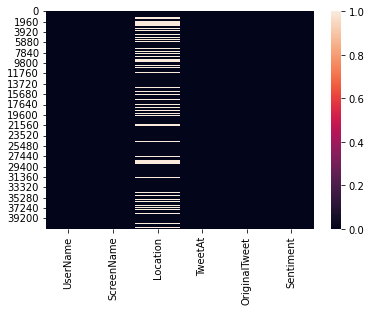

In [15]:
sns.heatmap(df_train.isnull())

In [18]:
print(df_train.isnull().sum())
print("> As we can see, there are missing values just on Location column")

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64
> As we can see, there are missing values just on Location column


##### Original Tweets

In [ ]:
df_train['OriginalTweet'] = df_train['OriginalTweet'].astype(str)
df_test['OriginalTweet'] = df_train['OriginalTweet'].astype(str)
combined_data['OriginalTweet'] = df_train['OriginalTweet'].astype(str)

In [44]:
# Check tweets has some unnecessary words. Find if exists and count
re_urls = r'http\S+'
re_html = r'<.*?>'
re_mentions = r'@\w+' 
re_hastags = r'#\w+'
re_digits = r'\d+'

print("Number of urls in tweets ", df_train['OriginalTweet'].str.count(re_urls).sum())
print("Number of html tag in tweets ", df_train['OriginalTweet'].str.count(re_html).sum())
print("Number of mentions in tweets ", df_train['OriginalTweet'].str.count(re_mentions).sum())
print("Number of hastags in tweets ", df_train['OriginalTweet'].str.count(re_hastags).sum())
print("Number of digits in tweets ", df_train['OriginalTweet'].str.count(re_digits).sum())

Number of urls in tweets  24012
Number of html tag in tweets  0
Number of mentions in tweets  17575
Number of hastags in tweets  81151
Number of digits in tweets  79640


In [ ]:
# remove unnecessary words that cannot effect classification
def remove_words(text):
    #remove urls
    text = re.sub(re_urls, "", text)
    #remove html tags
    text = re.sub(re_html,'', text)
    #remove mentions
    text = re.sub(re_mentions,' ',text)
    #remove hastags
    text = re.sub(re_hastags, ' ', text)
    #remove digits
    text = re.sub(re_digits, ' ', text)
    
    return text

df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x: remove_words(x))
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x: remove_words(x))
combined_data['OriginalTweet'] = combined_data['OriginalTweet'].apply(lambda x: remove_words(x))

##### Sentiments

In [6]:
### check target distribution on training data set
df_train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [7]:
def convertSentiment(sentiment):
    if sentiment == 'Extremely Positive':
        return 'Positive'
    elif sentiment == 'Extremely Negative':
        return 'Negative'
    else:
        return sentiment
    
df_train['Sentiment'] = df_train['Sentiment'].apply(lambda x:convertSentiment(x))
df_test['Sentiment'] = df_train['Sentiment'].apply(lambda x:convertSentiment(x))
combined_data['Sentiment'] = df_train['Sentiment'].apply(lambda x:convertSentiment(x))

In [8]:
# let's check again distribution of sentiments
df_train['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64